# Worksheet: Classification I: training & predicting

This worksheet covers the [Classification I: training & predicting](https://datasciencebook.ca/classification1.html) chapter of the online textbook, which also lists the learning objectives for this worksheet. You should read the textbook chapter before attempting this worksheet. 

In [1]:
 ### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

**Question 0.1** Multiple Choice: 
<br> {points: 1}

**Which of the following statements is NOT true of a training data set (in the context of classification)?**

A. A training data set is a collection of observations for which we know the true classes.

B. We can use a training set to explore and build our classifier.

C. The training data set is the underlying collection of observations for which we don't know the true classes.

*Assign your answer to an object called `answer0.1`. Make sure the correct answer is an uppercase letter. Remember to surround your answer with quotation marks (e.g. "D").*

In [4]:
# Replace the fail() with your answer. 

# your code here
answer0.1<-"C" # No Answer - remove if you provide an answer

In [5]:
library(digest)
stopifnot("type of answer0.1 is not character"= setequal(digest(paste(toString(class(answer0.1)), "d61f1")), "f94d540efe5be545d1314ed7fc4cef50"))
stopifnot("length of answer0.1 is not correct"= setequal(digest(paste(toString(length(answer0.1)), "d61f1")), "ae230260b0d96065a2fa62385253b54f"))
stopifnot("value of answer0.1 is not correct"= setequal(digest(paste(toString(tolower(answer0.1)), "d61f1")), "6c38fdd008504ba826aad69718a6df26"))
stopifnot("letters in string value of answer0.1 are correct but case is not correct"= setequal(digest(paste(toString(answer0.1), "d61f1")), "b7d893c6d594e358e4eb8b1d6dcb0a91"))

print('Success!')

[1] "Success!"


**Question 0.2** Multiple Choice
<br> {points: 1}

(Adapted from James et al, "[An introduction to statistical learning](http://www-bcf.usc.edu/~gareth/ISL/)" (page 53))

Consider the scenario below: 

We collect data on 20 similar products. For each product we have recorded whether it was a success or failure (labelled as such by the Sales team), price charged for the product, marketing budget, competition price, customer data, and ten other variables. 

**Which of the following is a classification problem?**

A. We are interested in comparing the profit margins for products that are a success and products that are a failure. 

B. We are considering launching a new product and wish to know whether it will be a success or a failure. 

C. We wish to group customers based on their preferences and use that knowledge to develop targeted marketing programs. 

*Assign your answer to an object called `answer0.2`. Make sure the correct answer is an uppercase letter. Remember to surround your answer with quotation marks (e.g. "F").*

In [8]:
# Replace the fail() with your answer. 

# your code here
answer0.2<-"B" # No Answer - remove if you provide an answer

In [9]:
library(digest)
stopifnot("type of answer0.2 is not character"= setequal(digest(paste(toString(class(answer0.2)), "1f34d")), "638069ba8e223b370e5b7ffbc657e4df"))
stopifnot("length of answer0.2 is not correct"= setequal(digest(paste(toString(length(answer0.2)), "1f34d")), "ef68b1075103f89ad725c62972606ae8"))
stopifnot("value of answer0.2 is not correct"= setequal(digest(paste(toString(tolower(answer0.2)), "1f34d")), "881a4b9bf3d91e24aadecc3993937737"))
stopifnot("letters in string value of answer0.2 are correct but case is not correct"= setequal(digest(paste(toString(answer0.2), "1f34d")), "2f98b85cb37af6b2a8ad6181b38c11cf"))

print('Success!')

[1] "Success!"


## 1. Breast Cancer Data Set 
We will work with the breast cancer data from this week's pre-reading. 
> Note that the breast cancer data in this worksheet have been **standardized (centred and scaled)** for you already. We will implement these steps in future worksheets/tutorials later, but for now, know the data has been standardized. Therefore the variables are unitless and hence why we have zero and negative values for variables like Radius. 

**Question 1.0**
<br> {points: 1}

Read the `clean-wdbc-data.csv` file (found in the `data` directory) using the `read_csv()` function into the notebook and store it as a data frame. Name it `cancer`.

In [14]:
# your code here
cancer<-read_csv("data/clean-wdbc-data.csv") # No Answer - remove if you provide an answer
cancer

Rows: 569 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (11): ID, Radius, Texture, Perimeter, Area, Smoothness, Compactness, Con...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Class,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
842302,M,1.885031,-1.35809849,2.301575,1.999478,1.3065367,2.6143647,2.1076718,2.294058,2.7482041,1.9353117
842517,M,1.804340,-0.36887865,1.533776,1.888827,-0.3752817,-0.4300658,-0.1466200,1.086129,-0.2436753,0.2809428
84300903,M,1.510541,-0.02395331,1.346291,1.455004,0.5269438,1.0819801,0.8542223,1.953282,1.1512420,0.2012142
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
926954,M,0.5608679,1.3736451,0.5784916,0.4275294,-0.8088756,0.350427,0.3264793,0.4137047,-1.10357792,-0.3181292
927241,M,1.9595152,2.2359585,2.3015755,1.6517174,1.4291692,3.901415,3.1947936,2.2879723,1.91739590,2.2176840
92751,B,-1.4096522,0.7635178,-1.4314754,-1.0748672,-1.8573842,-1.206491,-1.3046827,-1.7435287,-0.04809589,-0.7505463


In [15]:
library(digest)
stopifnot("cancer should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(cancer)), "c4a8d")), "d081108ca44a88f07c20797e74758f17"))
stopifnot("dimensions of cancer are not correct"= setequal(digest(paste(toString(dim(cancer)), "c4a8d")), "737f7997e3da044f7b1f9d07e603e17b"))
stopifnot("column names of cancer are not correct"= setequal(digest(paste(toString(sort(colnames(cancer))), "c4a8d")), "b4c03993d3eba35d739921922ab90bfd"))
stopifnot("types of columns in cancer are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(cancer, class)))), "c4a8d")), "c0d39ea4f3ea2c89d4b4db64ad910950"))
stopifnot("values in one or more numerical columns in cancer are not correct"= setequal(digest(paste(toString(if (any(sapply(cancer, is.numeric))) sort(round(sapply(cancer[, sapply(cancer, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "c4a8d")), "ad40df6138ac872483c44d00834f2e50"))
stopifnot("values in one or more character columns in cancer are not correct"= setequal(digest(paste(toString(if (any(sapply(cancer, is.character))) sum(sapply(cancer[sapply(cancer, is.character)], function(x) length(unique(x)))) else 0), "c4a8d")), "0093b1b10e3e7219509712a7e3240dd2"))
stopifnot("values in one or more factor columns in cancer are not correct"= setequal(digest(paste(toString(if (any(sapply(cancer, is.factor))) sum(sapply(cancer[, sapply(cancer, is.factor)], function(col) length(unique(col)))) else 0), "c4a8d")), "d48e95474e0387d235edefa62b5ab257"))

print('Success!')

[1] "Success!"


**Question 1.1** True or False: 
<br> {points: 1}

After looking at the first six rows of the `cancer` data fame, suppose we asked you to predict the variable "area" for a new observation. **Is this a classification problem?**

*Assign your answer to an object called `answer1.1`. Make sure the correct answer is written in lower-case. Remember to surround your answer with quotation marks (e.g. "true" / "false").*

In [18]:
# Replace the fail() with your answer. 

# your code here
answer1.1<-"false" # No Answer - remove if you provide an answer

In [19]:
library(digest)
stopifnot("type of answer1.1 is not character"= setequal(digest(paste(toString(class(answer1.1)), "d3ced")), "a279991fd55d4a12d2d38c7c9a04aae9"))
stopifnot("length of answer1.1 is not correct"= setequal(digest(paste(toString(length(answer1.1)), "d3ced")), "4bcb0f1404e642bf70c1e5f62538b416"))
stopifnot("value of answer1.1 is not correct"= setequal(digest(paste(toString(tolower(answer1.1)), "d3ced")), "7740a4aad24228289934ed26bd0ae69b"))
stopifnot("letters in string value of answer1.1 are correct but case is not correct"= setequal(digest(paste(toString(answer1.1), "d3ced")), "7740a4aad24228289934ed26bd0ae69b"))

print('Success!')

[1] "Success!"


We will be treating `Class` as a categorical variable, so we should convert it into a factor using the `as_factor()` function.

In [21]:
# run this cell
cancer <- cancer |>
        mutate(Class = as_factor(Class))

**Question 1.2** 
<br> {points: 1}

Create a scatterplot of the data with `Symmetry` on the x-axis and `Radius` on the y-axis. Modify your aesthetics by colouring for `Class`. As you create this plot, ensure you follow the guidelines for creating effective visualizations. In particular, note on the plot axes whether the data is standardized or not.

*Assign your plot to an object called `cancer_plot`.*

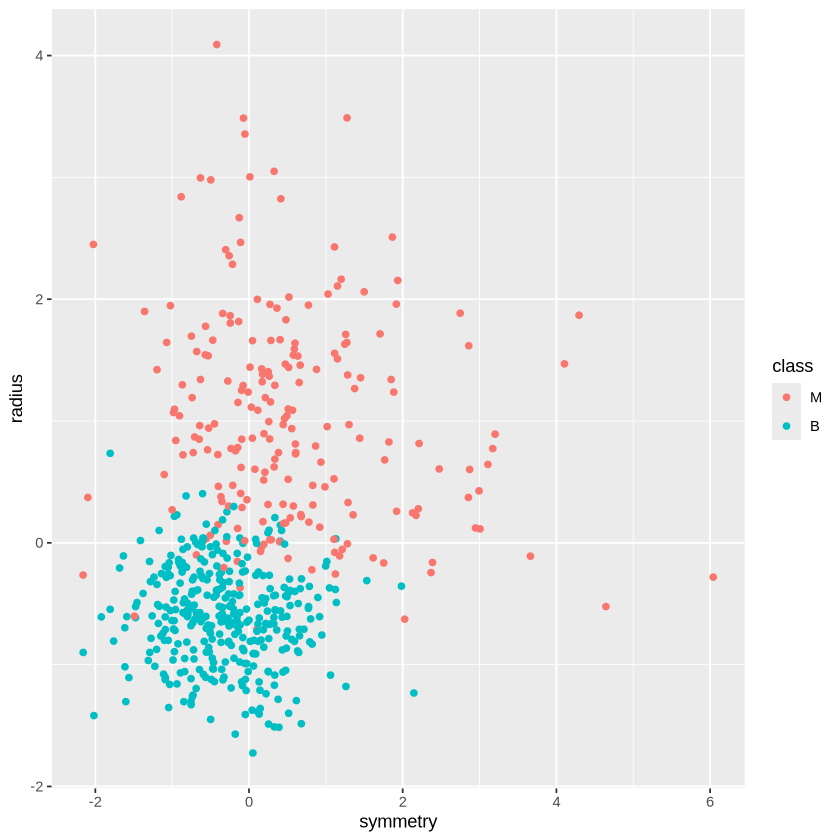

In [29]:
# your code here

cancer_plot<-cancer|>
    ggplot(aes(x=Symmetry,y=Radius,color=Class))+ 
    geom_point()+
    labs(x="symmetry", y="radius",color="class")# No Answer - remove if you provide an answer
cancer_plot

In [30]:
library(digest)
stopifnot("type of plot is not correct (if you are using two types of geoms, try flipping the order of the geom objects!)"= setequal(digest(paste(toString(sapply(seq_len(length(cancer_plot$layers)), function(i) {c(class(cancer_plot$layers[[i]]$geom))[1]})), "85cff")), "b18be84520a480bd46188dc1eaccccb6"))
stopifnot("variable x is not correct"= setequal(digest(paste(toString(unlist(lapply(sapply(seq_len(length(cancer_plot$layers)), function(i) {rlang::get_expr(c(cancer_plot$layers[[i]]$mapping, cancer_plot$mapping)$x)}), as.character))), "85cff")), "9e763efc666a7633c313c144abfd7224"))
stopifnot("variable y is not correct"= setequal(digest(paste(toString(unlist(lapply(sapply(seq_len(length(cancer_plot$layers)), function(i) {rlang::get_expr(c(cancer_plot$layers[[i]]$mapping, cancer_plot$mapping)$y)}), as.character))), "85cff")), "1aa2c0e1459af5afa9cb12229f088220"))
stopifnot("x-axis label is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(cancer_plot$layers[[1]]$mapping, cancer_plot$mapping)$x)!= cancer_plot$labels$x), "85cff")), "882a7d83262a62354f2819e61e8f5f45"))
stopifnot("y-axis label is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(cancer_plot$layers[[1]]$mapping, cancer_plot$mapping)$y)!= cancer_plot$labels$y), "85cff")), "882a7d83262a62354f2819e61e8f5f45"))
stopifnot("incorrect colour variable in cancer_plot, specify a correct one if required"= setequal(digest(paste(toString(rlang::get_expr(c(cancer_plot$layers[[1]]$mapping, cancer_plot$mapping)$colour)), "85cff")), "b6c6550fede4f6cf3ec85ae1b71ea848"))
stopifnot("incorrect shape variable in cancer_plot, specify a correct one if required"= setequal(digest(paste(toString(rlang::get_expr(c(cancer_plot$layers[[1]]$mapping, cancer_plot$mapping)$shape)), "85cff")), "2654d819ef825f25a63f97412d475430"))
stopifnot("the colour label in cancer_plot is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(cancer_plot$layers[[1]]$mapping, cancer_plot$mapping)$colour) != cancer_plot$labels$colour), "85cff")), "882a7d83262a62354f2819e61e8f5f45"))
stopifnot("the shape label in cancer_plot is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(cancer_plot$layers[[1]]$mapping, cancer_plot$mapping)$colour) != cancer_plot$labels$shape), "85cff")), "2654d819ef825f25a63f97412d475430"))
stopifnot("fill variable in cancer_plot is not correct"= setequal(digest(paste(toString(quo_name(cancer_plot$mapping$fill)), "85cff")), "911c666ad8c85e7e2e360aa603b2ce72"))
stopifnot("fill label in cancer_plot is not informative"= setequal(digest(paste(toString((quo_name(cancer_plot$mapping$fill) != cancer_plot$labels$fill)), "85cff")), "2654d819ef825f25a63f97412d475430"))
stopifnot("position argument in cancer_plot is not correct"= setequal(digest(paste(toString(class(cancer_plot$layers[[1]]$position)[1]), "85cff")), "f39c6bd01864e5ebf99cb628fc8b4e32"))

stopifnot("cancer_plot$data should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(cancer_plot$data)), "85d00")), "1eea8e8a2864e257d9b15c4911d924f2"))
stopifnot("dimensions of cancer_plot$data are not correct"= setequal(digest(paste(toString(dim(cancer_plot$data)), "85d00")), "0e782a28a962e76e8aa4a8a92330fd9b"))
stopifnot("column names of cancer_plot$data are not correct"= setequal(digest(paste(toString(sort(colnames(cancer_plot$data))), "85d00")), "26ea06a5a6f725beb7c1cb44785940f9"))
stopifnot("types of columns in cancer_plot$data are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(cancer_plot$data, class)))), "85d00")), "3ad05ea44c9d592c6de63b651926647e"))
stopifnot("values in one or more numerical columns in cancer_plot$data are not correct"= setequal(digest(paste(toString(if (any(sapply(cancer_plot$data, is.numeric))) sort(round(sapply(cancer_plot$data[, sapply(cancer_plot$data, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "85d00")), "60e72454a3a7586283f61c482ea37d32"))
stopifnot("values in one or more character columns in cancer_plot$data are not correct"= setequal(digest(paste(toString(if (any(sapply(cancer_plot$data, is.character))) sum(sapply(cancer_plot$data[sapply(cancer_plot$data, is.character)], function(x) length(unique(x)))) else 0), "85d00")), "d35d656414c317b315a087dfad2bed09"))
stopifnot("values in one or more factor columns in cancer_plot$data are not correct"= setequal(digest(paste(toString(if (any(sapply(cancer_plot$data, is.factor))) sum(sapply(cancer_plot$data[, sapply(cancer_plot$data, is.factor)], function(col) length(unique(col)))) else 0), "85d00")), "1f31640b33e5185dc57c24e11f22eac1"))

print('Success!')

[1] "Success!"


**Question 1.3** 
<br> {points: 1}

Just by looking at the scatterplot above, how would you classify an observation with `Symmetry` = 1 and `Radius` = 1 (Benign or Malignant)?

*Assign your answer to an object called `answer1.3`. Make sure the correct answer is written fully. Remember to surround your answer with quotation marks (e.g. "Benign" / "Malignant").*

In [31]:
# Replace the fail() with your answer. 

# your code here
answer1.3<-"Malignant"# No Answer - remove if you provide an answer

In [32]:
library(digest)
stopifnot("type of answer1.3 is not character"= setequal(digest(paste(toString(class(answer1.3)), "7c5a9")), "5333e92bc51119d1079f73e58f9072ec"))
stopifnot("length of answer1.3 is not correct"= setequal(digest(paste(toString(length(answer1.3)), "7c5a9")), "2a6160a55a9ab56e654d7c765d9756a7"))
stopifnot("value of answer1.3 is not correct"= setequal(digest(paste(toString(tolower(answer1.3)), "7c5a9")), "18890912c4ed27f04eeae22e37050c2a"))
stopifnot("letters in string value of answer1.3 are correct but case is not correct"= setequal(digest(paste(toString(answer1.3), "7c5a9")), "d39ed7e864e722a509f9b31cb0361e86"))

print('Success!')

[1] "Success!"


We will now compute the distance between the first and second observation in the breast cancer dataset using the explanatory variables/predictors `Symmetry` and `Radius`. Recall we can calculate the distance between two points using the following formula:

$$Distance = \sqrt{(a_x -b_x)^2 + (a_y - b_y)^2}$$

**Question 1.4** 
<br> {points: 1}

First, extract the coordinates for the two observations and assign them to objects called: 

- `ax` (Symmetry value for the first row)
- `ay` (Radius value for the first row)
- `bx` (Symmetry value for the second row)
- `by` (Radius value for the second row).

*Scaffolding for `ax` is given*.
> Note we are using the function `pull()` because we want the numeric value (and object) as our output rather than a `tibble` type object so we can do calculations later on. You can verify the object type in R with the `class()` function. Check the class of `ax` with and without the `pull()` function and see what you get! 

In [38]:
ax <- slice(cancer, 1) |> 
    pull(Symmetry)
ay <- slice(cancer, 1) |> 
    pull(Radius)
bx <- slice(cancer, 2) |> 
    pull(Symmetry)
by <- slice(cancer, 2) |> 
    pull(Radius)

# your code here
 # No Answer - remove if you provide an answer

In [39]:
library(digest)
stopifnot("type of ax is not numeric"= setequal(digest(paste(toString(class(ax)), "cb08a")), "f4983b92ef966e356f0d95b732cfd943"))
stopifnot("value of ax is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(ax, 2)), "cb08a")), "ac4bccacda57af4ec2d2feb6315aee26"))
stopifnot("length of ax is not correct"= setequal(digest(paste(toString(length(ax)), "cb08a")), "59c2d262903863dcdcf455b5377bdecd"))
stopifnot("values of ax are not correct"= setequal(digest(paste(toString(sort(round(ax, 2))), "cb08a")), "ac4bccacda57af4ec2d2feb6315aee26"))

stopifnot("type of ay is not numeric"= setequal(digest(paste(toString(class(ay)), "cb08b")), "9d4b9fc00b59dac47c1701e1c3502f58"))
stopifnot("value of ay is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(ay, 2)), "cb08b")), "ba43631f124a3fd5c73270e3bc3670c6"))
stopifnot("length of ay is not correct"= setequal(digest(paste(toString(length(ay)), "cb08b")), "2b598c79c4f07e10e833bbf6f4d0a8f9"))
stopifnot("values of ay are not correct"= setequal(digest(paste(toString(sort(round(ay, 2))), "cb08b")), "ba43631f124a3fd5c73270e3bc3670c6"))

stopifnot("type of bx is not numeric"= setequal(digest(paste(toString(class(bx)), "cb08c")), "97235befde5d035655ce2afab1ffbe9a"))
stopifnot("value of bx is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(bx, 2)), "cb08c")), "6c4c834a729cfdb7a1faf4f5794b9def"))
stopifnot("length of bx is not correct"= setequal(digest(paste(toString(length(bx)), "cb08c")), "b25b7cf3dcc7059f8a3f31f2dfe46c1d"))
stopifnot("values of bx are not correct"= setequal(digest(paste(toString(sort(round(bx, 2))), "cb08c")), "6c4c834a729cfdb7a1faf4f5794b9def"))

stopifnot("type of by is not numeric"= setequal(digest(paste(toString(class(by)), "cb08d")), "25d5cca6a93165d36013733581b3a966"))
stopifnot("value of by is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(by, 2)), "cb08d")), "59f5e44115735f4e672a08a51bf53341"))
stopifnot("length of by is not correct"= setequal(digest(paste(toString(length(by)), "cb08d")), "97d540b6e7790822c25d54a9fb558c5c"))
stopifnot("values of by are not correct"= setequal(digest(paste(toString(sort(round(by, 2))), "cb08d")), "59f5e44115735f4e672a08a51bf53341"))

print('Success!')

[1] "Success!"


**Question 1.5**
<br> {points: 1}

Plug the coordinates into the distance equation. 

*Assign your answer to an object called `answer1.5`.*

Fill in the `...` in the cell below. Copy and paste your finished answer into the `fail()`.

In [ ]:
#... <- sqrt((... - ...)^... + (... - ...)^...)

# your code here
answer1.5<0() # No Answer - remove if you provide an answer
answer1.5

In [ ]:
library(digest)
stopifnot("type of answer1.5 is not numeric"= setequal(digest(paste(toString(class(answer1.5)), "22c65")), "6391720009066d0f7aec4df232a9008c"))
stopifnot("value of answer1.5 is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(answer1.5, 2)), "22c65")), "7ede1c16ae684208e3fc5640e0a01c66"))
stopifnot("length of answer1.5 is not correct"= setequal(digest(paste(toString(length(answer1.5)), "22c65")), "f5f7175b23b5633cdc0f83e38d7afa29"))
stopifnot("values of answer1.5 are not correct"= setequal(digest(paste(toString(sort(round(answer1.5, 2))), "22c65")), "7ede1c16ae684208e3fc5640e0a01c66"))

print('Success!')

**Question 1.6**
<br> {points: 1}

Now we'll do the same thing *with 3 explanatory variables/predictors*: `Symmetry`, `Radius` and `Concavity`. Again, use the first two rows in the data set as the points you are calculating the distance between (point $a$ is row 1, and point $b$ is row 2).


Find the coordinates for the third variable (Concavity) and assign them to objects called `az` and `bz`. Use the scaffolding given in **Question 1.4** as a guide.

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
library(digest)
stopifnot("type of az is not numeric"= setequal(digest(paste(toString(class(az)), "bf507")), "e000b4a3af80cb8ff41a8a22658b5064"))
stopifnot("value of az is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(az, 2)), "bf507")), "ac34ebdb42062fc401a0825edec03d81"))
stopifnot("length of az is not correct"= setequal(digest(paste(toString(length(az)), "bf507")), "1024f9ce93c168f548ad6831596a1794"))
stopifnot("values of az are not correct"= setequal(digest(paste(toString(sort(round(az, 2))), "bf507")), "ac34ebdb42062fc401a0825edec03d81"))

stopifnot("type of bz is not numeric"= setequal(digest(paste(toString(class(bz)), "bf508")), "31793f4428283c7cc8997c847362f780"))
stopifnot("value of bz is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(bz, 2)), "bf508")), "6921997f9868eb6e0e24b646db9891fa"))
stopifnot("length of bz is not correct"= setequal(digest(paste(toString(length(bz)), "bf508")), "f9996ae2fe8a2e422f87693ae510e02b"))
stopifnot("values of bz are not correct"= setequal(digest(paste(toString(sort(round(bz, 2))), "bf508")), "6921997f9868eb6e0e24b646db9891fa"))

print('Success!')

**Question 1.7**
<br> {points: 1}

Again, calculate the distance between the first and second observation in the breast cancer dataset using 3 explanatory variables/predictors: `Symmetry`, `Radius` and `Concavity`.

*Assign your answer to an object called `answer1.7`. Use the scaffolding given to calculate `answer1.5` as a guide.*

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
answer1.7

In [ ]:
library(digest)
stopifnot("type of answer1.7 is not numeric"= setequal(digest(paste(toString(class(answer1.7)), "4723f")), "68d094b8bd068614ff653e0dd9e2fe4a"))
stopifnot("value of answer1.7 is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(answer1.7, 2)), "4723f")), "ded652bcb48ade450d80a82be7b16461"))
stopifnot("length of answer1.7 is not correct"= setequal(digest(paste(toString(length(answer1.7)), "4723f")), "c8853d6912be508208fb838e49e892e2"))
stopifnot("values of answer1.7 are not correct"= setequal(digest(paste(toString(sort(round(answer1.7, 2))), "4723f")), "ded652bcb48ade450d80a82be7b16461"))

print('Success!')

**Question 1.8**
<br> {points: 1}

Let's do this without explicitly making coordinate variables!

Create a vector of the coordinates for each point. Name one vector `point_a` and the other vector `point_b`. Within the vector, the order of coordinates should be: `Symmetry`, `Radius`, `Concavity`.

Fill in the `...` in the cell below. Copy and paste your finished answer into the `fail()`.


> Here will use `select` and `as.numeric` instead of `pull` because we need to get the numeric values of 3 columns. `pull`, that we used previously, only works to extract the numeric values from a single column.

In [ ]:
# This is only the scaffolding for one vector 
# You need to make another one for row number 2!

#... <- slice(cancer, 1) |>
#    select(..., Radius, ...) |>
#    as.numeric()


# your code here
fail() # No Answer - remove if you provide an answer
point_a
point_b

In [ ]:
library(digest)
stopifnot("type of point_a is not numeric"= setequal(digest(paste(toString(class(point_a)), "74749")), "6210245d4752351b8df4b78cdfcd0812"))
stopifnot("value of point_a is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(point_a, 2)), "74749")), "f1aa29280432618315eaa7e171c4174b"))
stopifnot("length of point_a is not correct"= setequal(digest(paste(toString(length(point_a)), "74749")), "6924b3e2375d119d68aae266016cab06"))
stopifnot("values of point_a are not correct"= setequal(digest(paste(toString(sort(round(point_a, 2))), "74749")), "b9cc59d275cd3c4dd376615cbfc6ad10"))

stopifnot("type of point_b is not numeric"= setequal(digest(paste(toString(class(point_b)), "7474a")), "66414709e3cef9f47766cd0343a817ee"))
stopifnot("value of point_b is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(point_b, 2)), "7474a")), "376a4eadf4d50a5b1b3f68be78f6fc3e"))
stopifnot("length of point_b is not correct"= setequal(digest(paste(toString(length(point_b)), "7474a")), "343b4fa52ba40d4a2cfbe8c765c8d244"))
stopifnot("values of point_b are not correct"= setequal(digest(paste(toString(sort(round(point_b, 2))), "7474a")), "b7c640fb021d560e565e521696d8a667"))

print('Success!')

**Question 1.9**
<br> {points: 1}

Compute the squared differences between the two vectors, `point_a` and `point_b`. The result should be a vector of length 3 named `dif_square`. *Hint: `^` is the exponent symbol in R.*

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
dif_square

In [ ]:
library(digest)
stopifnot("type of dif_square is not numeric"= setequal(digest(paste(toString(class(dif_square)), "1fbfe")), "866d05f062ce005fdf53ce6ebda3d07b"))
stopifnot("value of dif_square is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(dif_square, 2)), "1fbfe")), "79eee7914821d1469cf87532c4437f93"))
stopifnot("length of dif_square is not correct"= setequal(digest(paste(toString(length(dif_square)), "1fbfe")), "54f37d98d886797e55e4b96230e5e28f"))
stopifnot("values of dif_square are not correct"= setequal(digest(paste(toString(sort(round(dif_square, 2))), "1fbfe")), "746e5f26b74a912a7a3a077ab451832d"))

print('Success!')

**Question 1.9.1**
<br> {points: 1}

Sum the squared differences between the two vectors, `point_a` and `point_b`. The result should be a single number named `dif_sum`. 

*Hint: the `sum` function in R returns the sum of the elements of a vector*

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
dif_sum

In [ ]:
library(digest)
stopifnot("type of dif_sum is not numeric"= setequal(digest(paste(toString(class(dif_sum)), "7f526")), "1494397f69b373175b5f9c1451665709"))
stopifnot("value of dif_sum is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(dif_sum, 2)), "7f526")), "b90fa395fb99296c634f14f1a5e856ad"))
stopifnot("length of dif_sum is not correct"= setequal(digest(paste(toString(length(dif_sum)), "7f526")), "c04eb49185df26afe1c53ff823769ee5"))
stopifnot("values of dif_sum are not correct"= setequal(digest(paste(toString(sort(round(dif_sum, 2))), "7f526")), "b90fa395fb99296c634f14f1a5e856ad"))

print('Success!')

**Question 1.9.2**
<br> {points: 1}

Square root the sum of your squared differences. The result should be a double named `root_dif_sum`. 

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
root_dif_sum

In [ ]:
library(digest)
stopifnot("type of root_dif_sum is not numeric"= setequal(digest(paste(toString(class(root_dif_sum)), "b40ef")), "c735f553f2207aa9c15cf9cc60368a17"))
stopifnot("value of root_dif_sum is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(root_dif_sum, 2)), "b40ef")), "08f497e3d091d3930974bfd194aa915c"))
stopifnot("length of root_dif_sum is not correct"= setequal(digest(paste(toString(length(root_dif_sum)), "b40ef")), "a685e85fa7210702775cc497da752ee4"))
stopifnot("values of root_dif_sum are not correct"= setequal(digest(paste(toString(sort(round(root_dif_sum, 2))), "b40ef")), "08f497e3d091d3930974bfd194aa915c"))

print('Success!')

**Question 1.9.3**
<br> {points: 1}

If we have more than a few points, calculating distances as we did in the previous questions is VERY tedious. Let's use the `dist()` function to find the distance between the first and second observation in the breast cancer dataset using Symmetry, Radius and Concavity. 

Fill in the `...` in the cell below. Copy and paste your finished answer into the `fail()`.

*Assign your answer to an object called `dist_cancer_two_rows`.*

In [ ]:
# ... <- cancer  |> 
#    slice(1,2)  |> 
#    select(..., ..., Concavity)  |> 
#    dist()

# your code here
fail() # No Answer - remove if you provide an answer
dist_cancer_two_rows

In [ ]:
library(digest)
stopifnot("type of dist_cancer_two_rows[1] is not numeric"= setequal(digest(paste(toString(class(dist_cancer_two_rows[1])), "70ddf")), "00689b1cb6e8ea08105072b645e8bf8b"))
stopifnot("value of dist_cancer_two_rows[1] is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(dist_cancer_two_rows[1], 2)), "70ddf")), "249348b52b6617a16ad83e46fbab56a5"))
stopifnot("length of dist_cancer_two_rows[1] is not correct"= setequal(digest(paste(toString(length(dist_cancer_two_rows[1])), "70ddf")), "7eaff3b11b4bebf35bee530e15b4240e"))
stopifnot("values of dist_cancer_two_rows[1] are not correct"= setequal(digest(paste(toString(sort(round(dist_cancer_two_rows[1], 2))), "70ddf")), "249348b52b6617a16ad83e46fbab56a5"))

print('Success!')

**Question 1.9.4** True or False: 
<br> {points: 1}

Compare `answer1.7`, `root_dif_sum`, and `dist_cancer_two_rows`. 

**Are they all the same value?** 

*Assign your answer to an object called `answer1.9.4`. Make sure the correct answer is written in lower-case. Remember to surround your answer with quotation marks (e.g. "true" / "false").*

*Hint: the `sqrt` function in R returns the square root of an element*

In [ ]:
# Replace the fail() with your answer. 

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
library(digest)
stopifnot("type of answer1.9.4 is not character"= setequal(digest(paste(toString(class(answer1.9.4)), "81954")), "329cde33b904968e1958591f6352f494"))
stopifnot("length of answer1.9.4 is not correct"= setequal(digest(paste(toString(length(answer1.9.4)), "81954")), "d3b6ce27e8a684bce64157b1547405bc"))
stopifnot("value of answer1.9.4 is not correct"= setequal(digest(paste(toString(tolower(answer1.9.4)), "81954")), "9dc46159aea5641f00bac1d5bb4519fc"))
stopifnot("letters in string value of answer1.9.4 are correct but case is not correct"= setequal(digest(paste(toString(answer1.9.4), "81954")), "9dc46159aea5641f00bac1d5bb4519fc"))

print('Success!')

## 2. Classification - A Simple Example Done Manually

**Question 2.0.0**
<br> {points: 1}

Let's take a random sample of 5 observations from the breast cancer dataset using the `slice_sample` function. To make this random sample reproducible, we will use `set.seed(20)`. This means that the random number generator will start at the same point each time when we run the code and we will always get back the same random samples. 

We will focus on the predictors Symmetry and Radius only. Thus, we will need to select the columns `Symmetry` and `Radius` and `Class`. Save these 5 rows and 3 columns to a data frame named `small_sample`.

Fill in the `...` in the scaffolding provided below.

In [ ]:
#set.seed(20)                           
#... <- cancer |> 
#    slice_sample(n = ...) |>  
#    select(...) 

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
library(digest)
stopifnot("small_sample should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(small_sample)), "6f4ef")), "9f87d72229dfb8b63b40f25e54ca8070"))
stopifnot("dimensions of small_sample are not correct"= setequal(digest(paste(toString(dim(small_sample)), "6f4ef")), "65237cfa193b02282f48c3eb0cc73a35"))
stopifnot("column names of small_sample are not correct"= setequal(digest(paste(toString(sort(colnames(small_sample))), "6f4ef")), "50bf59150a3c53d8f35360f1c54ffee4"))
stopifnot("types of columns in small_sample are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(small_sample, class)))), "6f4ef")), "8f92ae12af9a1fd0add6c21e4ae67ed6"))
stopifnot("values in one or more numerical columns in small_sample are not correct"= setequal(digest(paste(toString(if (any(sapply(small_sample, is.numeric))) sort(round(sapply(small_sample[, sapply(small_sample, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "6f4ef")), "c6c3a45307d96f289face098fec4ea1b"))
stopifnot("values in one or more character columns in small_sample are not correct"= setequal(digest(paste(toString(if (any(sapply(small_sample, is.character))) sum(sapply(small_sample[sapply(small_sample, is.character)], function(x) length(unique(x)))) else 0), "6f4ef")), "908a39689b55909abe2080b94e627dc4"))
stopifnot("values in one or more factor columns in small_sample are not correct"= setequal(digest(paste(toString(if (any(sapply(small_sample, is.factor))) sum(sapply(small_sample[, sapply(small_sample, is.factor)], function(col) length(unique(col)))) else 0), "6f4ef")), "62e81bd8b0eae393d3210487a9fbdf28"))

print('Success!')

**Question 2.0.1**
<br> {points: 1}

Finally, create a scatter plot where `Symmetry` is on the x-axis, and `Radius` is on the y-axis. Color the points by `Class`. Name your plot `small_sample_plot`.

Fill in the `...` in the scaffolding provided below.

As you create this plot, ensure you follow the guidelines for creating effective visualizations. In particular, note on the plot axes whether the data is standardized or not.

In [ ]:
#... <- ...|>   
#    ggplot(...) + 
#        geom_...() +
#        ...

# your code here
fail() # No Answer - remove if you provide an answer
small_sample_plot

In [ ]:
library(digest)
stopifnot("type of plot is not correct (if you are using two types of geoms, try flipping the order of the geom objects!)"= setequal(digest(paste(toString(sapply(seq_len(length(small_sample_plot$layers)), function(i) {c(class(small_sample_plot$layers[[i]]$geom))[1]})), "215c2")), "2fefbb8ee5db9a4a89370fbc2cbb571e"))
stopifnot("variable x is not correct"= setequal(digest(paste(toString(unlist(lapply(sapply(seq_len(length(small_sample_plot$layers)), function(i) {rlang::get_expr(c(small_sample_plot$layers[[i]]$mapping, small_sample_plot$mapping)$x)}), as.character))), "215c2")), "214362ed206ba392a4c5db7c447bdda7"))
stopifnot("variable y is not correct"= setequal(digest(paste(toString(unlist(lapply(sapply(seq_len(length(small_sample_plot$layers)), function(i) {rlang::get_expr(c(small_sample_plot$layers[[i]]$mapping, small_sample_plot$mapping)$y)}), as.character))), "215c2")), "d7b53339b1b8ec658c563f2afca03f86"))
stopifnot("x-axis label is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(small_sample_plot$layers[[1]]$mapping, small_sample_plot$mapping)$x)!= small_sample_plot$labels$x), "215c2")), "75f608ac4d76dd5d4877e77650b962a4"))
stopifnot("y-axis label is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(small_sample_plot$layers[[1]]$mapping, small_sample_plot$mapping)$y)!= small_sample_plot$labels$y), "215c2")), "75f608ac4d76dd5d4877e77650b962a4"))
stopifnot("incorrect colour variable in small_sample_plot, specify a correct one if required"= setequal(digest(paste(toString(rlang::get_expr(c(small_sample_plot$layers[[1]]$mapping, small_sample_plot$mapping)$colour)), "215c2")), "f265c1fa7e175d99ab145d243fbb68b9"))
stopifnot("incorrect shape variable in small_sample_plot, specify a correct one if required"= setequal(digest(paste(toString(rlang::get_expr(c(small_sample_plot$layers[[1]]$mapping, small_sample_plot$mapping)$shape)), "215c2")), "f13218164a4412ae19fb5161cbe21faa"))
stopifnot("the colour label in small_sample_plot is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(small_sample_plot$layers[[1]]$mapping, small_sample_plot$mapping)$colour) != small_sample_plot$labels$colour), "215c2")), "75f608ac4d76dd5d4877e77650b962a4"))
stopifnot("the shape label in small_sample_plot is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(small_sample_plot$layers[[1]]$mapping, small_sample_plot$mapping)$colour) != small_sample_plot$labels$shape), "215c2")), "f13218164a4412ae19fb5161cbe21faa"))
stopifnot("fill variable in small_sample_plot is not correct"= setequal(digest(paste(toString(quo_name(small_sample_plot$mapping$fill)), "215c2")), "9e0daf53c8a803af75b31bbaf094f9bc"))
stopifnot("fill label in small_sample_plot is not informative"= setequal(digest(paste(toString((quo_name(small_sample_plot$mapping$fill) != small_sample_plot$labels$fill)), "215c2")), "f13218164a4412ae19fb5161cbe21faa"))
stopifnot("position argument in small_sample_plot is not correct"= setequal(digest(paste(toString(class(small_sample_plot$layers[[1]]$position)[1]), "215c2")), "47f195e6e14bdae7acd3790d2d1d3183"))

stopifnot("small_sample_plot$data should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(small_sample_plot$data)), "215c3")), "c48c7ca57c6d84616ce72bd68546a882"))
stopifnot("dimensions of small_sample_plot$data are not correct"= setequal(digest(paste(toString(dim(small_sample_plot$data)), "215c3")), "7369c0297dcae6164ccb9c05851dd665"))
stopifnot("column names of small_sample_plot$data are not correct"= setequal(digest(paste(toString(sort(colnames(small_sample_plot$data))), "215c3")), "40142e4417ba4c58e75362ce947c63b8"))
stopifnot("types of columns in small_sample_plot$data are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(small_sample_plot$data, class)))), "215c3")), "eb2208a851ca59b3c1d8dd5d06661a66"))
stopifnot("values in one or more numerical columns in small_sample_plot$data are not correct"= setequal(digest(paste(toString(if (any(sapply(small_sample_plot$data, is.numeric))) sort(round(sapply(small_sample_plot$data[, sapply(small_sample_plot$data, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "215c3")), "0d528211d24b342ded0b12e4c0e3bab5"))
stopifnot("values in one or more character columns in small_sample_plot$data are not correct"= setequal(digest(paste(toString(if (any(sapply(small_sample_plot$data, is.character))) sum(sapply(small_sample_plot$data[sapply(small_sample_plot$data, is.character)], function(x) length(unique(x)))) else 0), "215c3")), "5bae7852722ae72f549e2885f25e237d"))
stopifnot("values in one or more factor columns in small_sample_plot$data are not correct"= setequal(digest(paste(toString(if (any(sapply(small_sample_plot$data, is.factor))) sum(sapply(small_sample_plot$data[, sapply(small_sample_plot$data, is.factor)], function(col) length(unique(col)))) else 0), "215c3")), "46fe015f1241abf428583c9d02c34ad6"))

print('Success!')

**Question 2.1** 
<br> {points: 1}

Suppose we are interested in classifying a new observation with `Symmetry = 0.5` and `Radius = 0`, but unknown `Class`. Using the `small_sample` data frame, add another row with `Symmetry = 0.5`, `Radius = 0`, and `Class = "unknown"`.

Fill in the `...` in the scaffolding provided below.

*Assign your answer to an object called `newData`.*

In [ ]:
#... <- ... |>
#    add_row(Symmetry = ..., ... = 0, Class = ...)

# your code here
fail() # No Answer - remove if you provide an answer
newData

In [ ]:
library(digest)
stopifnot("newData should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(newData)), "a7ab9")), "7ef28986d350df664cb007805f1016ce"))
stopifnot("dimensions of newData are not correct"= setequal(digest(paste(toString(dim(newData)), "a7ab9")), "c26ed8e61c76f2d41f626b8528995e56"))
stopifnot("column names of newData are not correct"= setequal(digest(paste(toString(sort(colnames(newData))), "a7ab9")), "e2e2b5fd523bedd6d2ad31eab63e1629"))
stopifnot("types of columns in newData are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(newData, class)))), "a7ab9")), "fa07b46fe2b9b62bceff827259a48db6"))
stopifnot("values in one or more numerical columns in newData are not correct"= setequal(digest(paste(toString(if (any(sapply(newData, is.numeric))) sort(round(sapply(newData[, sapply(newData, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "a7ab9")), "8bcec3d18d9a9986c0fd0d9f9f656720"))
stopifnot("values in one or more character columns in newData are not correct"= setequal(digest(paste(toString(if (any(sapply(newData, is.character))) sum(sapply(newData[sapply(newData, is.character)], function(x) length(unique(x)))) else 0), "a7ab9")), "a76de29a64a3be8a61a27a5a069ad4c4"))
stopifnot("values in one or more factor columns in newData are not correct"= setequal(digest(paste(toString(if (any(sapply(newData, is.factor))) sum(sapply(newData[, sapply(newData, is.factor)], function(col) length(unique(col)))) else 0), "a7ab9")), "6588858d8af116e9227d3ee983a3b074"))

print('Success!')

**Question 2.2**
<br> {points: 1}

Compute the distance between each pair of the 6 observations in the `newData` dataframe using the `dist()` function based on two variables: `Symmetry` and `Radius`. Fill in the `...` in the scaffolding provided below.


*Assign your answer to an object called `dist_matrix`.*

In [ ]:
# ... <- newData |>
#    select(..., ...) |> 
#    ...() |>                   
#    as.matrix() 

# your code here
fail() # No Answer - remove if you provide an answer
dist_matrix

In [ ]:
library(digest)
stopifnot("type of class(dist_matrix) is not character"= setequal(digest(paste(toString(class(class(dist_matrix))), "5cb13")), "fab1cc41de9423b1061e7bb5ba2a1c02"))
stopifnot("length of class(dist_matrix) is not correct"= setequal(digest(paste(toString(length(class(dist_matrix))), "5cb13")), "630ac81b02fd826c9dd89496a07b502b"))
stopifnot("value of class(dist_matrix) is not correct"= setequal(digest(paste(toString(tolower(class(dist_matrix))), "5cb13")), "03c508931feadf7ade57ae5d5c6d8ee3"))
stopifnot("letters in string value of class(dist_matrix) are correct but case is not correct"= setequal(digest(paste(toString(class(dist_matrix)), "5cb13")), "03c508931feadf7ade57ae5d5c6d8ee3"))

stopifnot("as.data.frame(dist_matrix) should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(as.data.frame(dist_matrix))), "5cb14")), "f38f422bebff047dd7f3a1e02c202148"))
stopifnot("dimensions of as.data.frame(dist_matrix) are not correct"= setequal(digest(paste(toString(dim(as.data.frame(dist_matrix))), "5cb14")), "8eec941ac60d5634939fed130562be29"))
stopifnot("column names of as.data.frame(dist_matrix) are not correct"= setequal(digest(paste(toString(sort(colnames(as.data.frame(dist_matrix)))), "5cb14")), "b41c0c09a89a290852cc14fe0361411d"))
stopifnot("types of columns in as.data.frame(dist_matrix) are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(as.data.frame(dist_matrix), class)))), "5cb14")), "6ee5bd605f0b42b820cd375bb1284b3d"))
stopifnot("values in one or more numerical columns in as.data.frame(dist_matrix) are not correct"= setequal(digest(paste(toString(if (any(sapply(as.data.frame(dist_matrix), is.numeric))) sort(round(sapply(as.data.frame(dist_matrix)[, sapply(as.data.frame(dist_matrix), is.numeric)], sum, na.rm = TRUE), 2)) else 0), "5cb14")), "958a9995ba328918d52e638227f050f8"))
stopifnot("values in one or more character columns in as.data.frame(dist_matrix) are not correct"= setequal(digest(paste(toString(if (any(sapply(as.data.frame(dist_matrix), is.character))) sum(sapply(as.data.frame(dist_matrix)[sapply(as.data.frame(dist_matrix), is.character)], function(x) length(unique(x)))) else 0), "5cb14")), "7fa2a478f607f8ec32d10801dad5c953"))
stopifnot("values in one or more factor columns in as.data.frame(dist_matrix) are not correct"= setequal(digest(paste(toString(if (any(sapply(as.data.frame(dist_matrix), is.factor))) sum(sapply(as.data.frame(dist_matrix)[, sapply(as.data.frame(dist_matrix), is.factor)], function(col) length(unique(col)))) else 0), "5cb14")), "7fa2a478f607f8ec32d10801dad5c953"))

print('Success!')

**Question 2.3** Multiple Choice:
<br> {points: 1}

In the table above, the row and column numbers reflect the row number from the data frame the `dist` function was applied to. Thus numbers 1 - 5 were the points/observations from rows 1 - 5 in the `small_sample` data frame. Row 6 was the new observation that we do not know the diagnosis class for.  The values in `dist_matrix` are the distances between the points of the row and column number. For example, the distance between the point 2 and point 4 is 4.196683. And the distance between point 3 and point 3 (the same point) is 0.

**Which observation is the nearest to our new point?**

*Assign your answer to an object called `answer2.3`. Make sure your answer is a number. Remember to surround your answer with quotation marks (e.g. "8").*

In [ ]:
# Replace the fail() with your answer. 

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
library(digest)
stopifnot("type of answer2.3 is not character"= setequal(digest(paste(toString(class(answer2.3)), "ee6b8")), "0d9397dec1ea680fe2729aff2ddb876e"))
stopifnot("length of answer2.3 is not correct"= setequal(digest(paste(toString(length(answer2.3)), "ee6b8")), "e5ad1e08af9a0d0555a1e672d217af05"))
stopifnot("value of answer2.3 is not correct"= setequal(digest(paste(toString(tolower(answer2.3)), "ee6b8")), "f7cb0dae62f893efab1184e514d0cab9"))
stopifnot("letters in string value of answer2.3 are correct but case is not correct"= setequal(digest(paste(toString(answer2.3), "ee6b8")), "f7cb0dae62f893efab1184e514d0cab9"))

print('Success!')

**Question 2.4** Multiple Choice: 
<br> {points: 1}

Use the K-nearest neighbour classification algorithm with K = 1 to classify the new observation using your answers to **Questions 2.2 & 2.3**. Is the new data point predicted to be benign or malignant?

*Assign your answer to an object called `answer2.4`. Make sure the correct answer is written fully as either "Benign" or "Malignant". Remember to surround your answer with quotation marks.* 

In [ ]:
# Replace the fail() with your answer. 

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
library(digest)
stopifnot("type of answer2.4 is not character"= setequal(digest(paste(toString(class(answer2.4)), "222e0")), "a0874b28d43073c91dacaf3790de29a1"))
stopifnot("length of answer2.4 is not correct"= setequal(digest(paste(toString(length(answer2.4)), "222e0")), "ba174c4c2e18288d633f28813a00c34e"))
stopifnot("value of answer2.4 is not correct"= setequal(digest(paste(toString(tolower(answer2.4)), "222e0")), "fcfe3de9c36500158820a00e215b0db9"))
stopifnot("letters in string value of answer2.4 are correct but case is not correct"= setequal(digest(paste(toString(answer2.4), "222e0")), "c6136a8ccd49fbce9dfd6d9c4c6eb3e8"))

print('Success!')

**Question 2.5** Multiple Choice:
<br> {points: 1}

Using your answers to **Questions 2.2 & 2.3**, what are the three closest observations to your new point?

A. 1, 3, 2

B. 5, 1, 4

C. 5, 2, 4

D. 3, 4, 2

*Assign your answer to an object called `answer2.5`. Make sure the correct answer is an uppercase letter. Remember to surround your answer with quotation marks (e.g. "F").*

In [ ]:
# Replace the fail() with your answer. 

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
library(digest)
stopifnot("type of answer2.5 is not character"= setequal(digest(paste(toString(class(answer2.5)), "2866f")), "a14bb7f665002b8dd97b054bec2d0012"))
stopifnot("length of answer2.5 is not correct"= setequal(digest(paste(toString(length(answer2.5)), "2866f")), "7d0e60f96c27eb8532801814b58476b9"))
stopifnot("value of answer2.5 is not correct"= setequal(digest(paste(toString(tolower(answer2.5)), "2866f")), "d2ca209b93447546af57ec928204c38a"))
stopifnot("letters in string value of answer2.5 are correct but case is not correct"= setequal(digest(paste(toString(answer2.5), "2866f")), "d70b86bb42d93dc9ed2ae537b7ec14a1"))

print('Success!')

**Question 2.6** Multiple Choice: 
<br> {points: 1}

We will now use the K-nearest neighbour classification algorithm with K = 3 to classify the new observation using your answers to **Questions 2.2 & 2.3**. Is the new data point predicted to be benign or malignant?

*Assign your answer to an object called `answer2.6`. Make sure the correct answer is written fully. Remember to surround your answer with quotation marks (e.g. "Benign" / "Malignant").*

In [ ]:
# Replace the fail() with your answer. 

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
library(digest)
stopifnot("type of answer2.6 is not character"= setequal(digest(paste(toString(class(answer2.6)), "a40c5")), "27b0410b6af0775a31ecdf814103a2f0"))
stopifnot("length of answer2.6 is not correct"= setequal(digest(paste(toString(length(answer2.6)), "a40c5")), "fb1adba4463786323435dbac5b8332da"))
stopifnot("value of answer2.6 is not correct"= setequal(digest(paste(toString(tolower(answer2.6)), "a40c5")), "d242250c0bb4fbb4ef687dce60be85d1"))
stopifnot("letters in string value of answer2.6 are correct but case is not correct"= setequal(digest(paste(toString(answer2.6), "a40c5")), "f081b939f39240e581abeb59236be6d3"))

print('Success!')

**Question 2.7**
<br> {points: 1}

Compare your answers in 2.4 and 2.6. Are they the same?

*Assign your answer to an object called `answer2.7`. Make sure the correct answer is written in lower-case. Remember to surround your answer with quotation marks (e.g. "yes" / "no").* 

In [ ]:
# Replace the fail() with your answer. 

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
library(digest)
stopifnot("type of answer2.7 is not character"= setequal(digest(paste(toString(class(answer2.7)), "ef641")), "b67d4f9af0db59d4256224cb293791ab"))
stopifnot("length of answer2.7 is not correct"= setequal(digest(paste(toString(length(answer2.7)), "ef641")), "ad82faede190e547d66445dc72d5e6e5"))
stopifnot("value of answer2.7 is not correct"= setequal(digest(paste(toString(tolower(answer2.7)), "ef641")), "4fb1974423ec11c1e183abeefc89d934"))
stopifnot("letters in string value of answer2.7 are correct but case is not correct"= setequal(digest(paste(toString(answer2.7), "ef641")), "4fb1974423ec11c1e183abeefc89d934"))

print('Success!')

## 3. Using `tidymodels` to perform k-nearest neighbours

Now that we understand how K-nearest neighbours (k-nn) classification works, let's get familar with the `tidymodels` R package. The benefit of using `tidymodels` is that it will keep our code simple, readable and accurate. Coding less and in a tidier format means that there is less chance for errors to occur.  

We'll again focus on `Radius` and `Symmetry` as the two predictors. This time, we would like to predict the class of a new observation with `Symmetry = 1` and `Radius = 0`. This one is a bit tricky to do visually from the plot below, and so is a motivating example for us to compute the prediction using k-nn with the `tidymodels` package. Let's use `K = 7`.

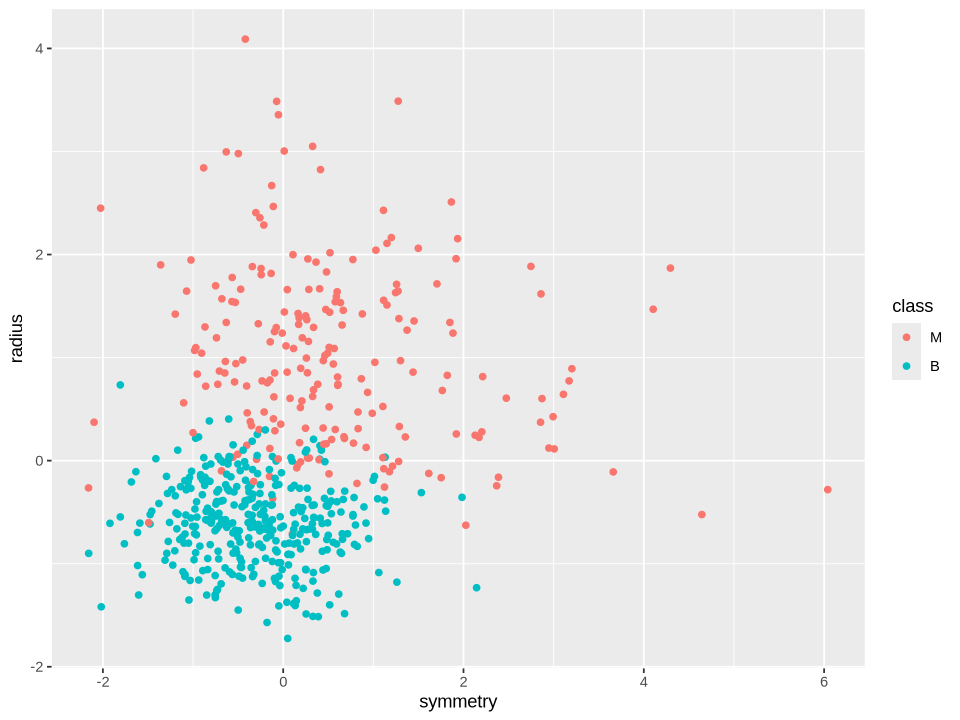

In [40]:
options(repr.plot.width = 8, repr.plot.height = 6) # you can change the size of the plot if it is too small or too large 
cancer_plot

**Question 3.1** 
<br> {points: 1}

Create a **model specification** for K-nearest neighbours classification by using the `nearest_neighbor()` function. Specify that we want to set `k = 7` and use the *straight-line distance*. Furthermore, specify the *computational engine* to be `"kknn"` for training the model with the `set_engine()` function. Finally, identify that this is a *classification* problem with the `set_mode()` function. 

Name your model specification `knn_spec`.

In [ ]:
#... <- nearest_neighbor(weight_func = ..., neighbors = ...) |>
#       set_engine(...) |>
#       set_mode(...)

# your code here
fail() # No Answer - remove if you provide an answer
knn_spec

In [ ]:
library(digest)
stopifnot("knn_spec should be a model specification"= setequal(digest(paste(toString('model_spec' %in% class(knn_spec)), "e261a")), "4d38506d54f876e4da16d05053a18f63"))
stopifnot("model specification in knn_spec is not correct"= setequal(digest(paste(toString(knn_spec$mode), "e261a")), "567fb3908015e7157c38dc0ae07156c5"))
stopifnot("computational engine in knn_spec is not correct"= setequal(digest(paste(toString(knn_spec$engine), "e261a")), "56d38fa8ba8e24a5e929360390c55ab5"))
stopifnot("weight function in knn_spec is not correct"= setequal(digest(paste(toString(quo_name(knn_spec$args$weight_func)), "e261a")), "ee8335ebada7f5f7eb4aa37fc9844960"))
stopifnot("number of neighbours in knn_spec is not correct"= setequal(digest(paste(toString(quo_name(knn_spec$args$neighbors)), "e261a")), "a5eb24d28ea8aa5c36ddeb60bd1607ef"))

print('Success!')

**Question 3.2**
<br> {points: 1}

To train the model on the breast cancer dataset, pass `knn_spec` and the `cancer` dataset to the `fit()` function. Specify `Class` as your target variable and the `Symmetry` and `Radius` variables as your predictors. Name your fitted model as `knn_fit`.

In [ ]:
# ... <- ... |> 
#        fit(... ~ Symmetry + ..., data = ...)

# your code here
fail() # No Answer - remove if you provide an answer
knn_fit

In [ ]:
library(digest)
stopifnot("knn_fit should be a fit model"= setequal(digest(paste(toString('model_fit' %in% class(knn_fit)), "7709e")), "d4b4909688b61cc27d52eb9a063e29fb"))
stopifnot("knn_fit does not use the correct columns and/or the correct model formula"= setequal(digest(paste(toString(sort(row.names(attributes(knn_fit$fit$terms)$factors))), "7709e")), "b2124a901979a013f2c94126cd0b4ec0"))
stopifnot("weight function of model specification is not correct"= setequal(digest(paste(toString(quo_name(knn_fit$spec$args$weight_func)), "7709e")), "5a1995cdd07c7ea9e4d5cf8634745f81"))
stopifnot("number of neighbours of model specification is not correct"= setequal(digest(paste(toString(quo_name(knn_fit$spec$args$neighbors)), "7709e")), "04c375210471ab59757dd9267524d286"))
stopifnot("computational engine of model specification is not correct"= setequal(digest(paste(toString(knn_fit$spec$engine), "7709e")), "d179df8db9a7a6f06c837419d0909b75"))
stopifnot("model specification of model specification is not correct"= setequal(digest(paste(toString(knn_fit$spec$mode), "7709e")), "f6319263df4062ca21f6d352aee1d7fd"))

stopifnot("knn_fit$fit$data should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(knn_fit$fit$data)), "7709f")), "b4e7a946ddb56fe90dca38486b8f6107"))
stopifnot("dimensions of knn_fit$fit$data are not correct"= setequal(digest(paste(toString(dim(knn_fit$fit$data)), "7709f")), "64730bdf3ae580de0ebee6664e229f10"))
stopifnot("column names of knn_fit$fit$data are not correct"= setequal(digest(paste(toString(sort(colnames(knn_fit$fit$data))), "7709f")), "707242765767c497be03e861ea5388ff"))
stopifnot("types of columns in knn_fit$fit$data are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(knn_fit$fit$data, class)))), "7709f")), "ae76ce4531f36b3611b14e69c7b17efe"))
stopifnot("values in one or more numerical columns in knn_fit$fit$data are not correct"= setequal(digest(paste(toString(if (any(sapply(knn_fit$fit$data, is.numeric))) sort(round(sapply(knn_fit$fit$data[, sapply(knn_fit$fit$data, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "7709f")), "49f5e954186473344f2abc10ae01688c"))
stopifnot("values in one or more character columns in knn_fit$fit$data are not correct"= setequal(digest(paste(toString(if (any(sapply(knn_fit$fit$data, is.character))) sum(sapply(knn_fit$fit$data[sapply(knn_fit$fit$data, is.character)], function(x) length(unique(x)))) else 0), "7709f")), "9e6d306888ef0c486d5030121321be12"))
stopifnot("values in one or more factor columns in knn_fit$fit$data are not correct"= setequal(digest(paste(toString(if (any(sapply(knn_fit$fit$data, is.factor))) sum(sapply(knn_fit$fit$data[, sapply(knn_fit$fit$data, is.factor)], function(col) length(unique(col)))) else 0), "7709f")), "2a2e83019244d7b9bb1ad0fbb99ef5d0"))

print('Success!')

**Question 3.3**
<br>{points: 1}

Now we will make our prediction on the `Class` of a new observation with a `Symmetry` of 1 and a `Radius` of 0. First, create a tibble with these variables and values and call it `new_obs`. Next, use the `predict()` function to obtain our prediction by passing `knn_fit` and `new_obs` to it. Name your predicted class as `class_prediction`.

In [ ]:
#... <- tibble(... = 1,... = 0)
#... <- predict(..., ...)

# your code here
fail() # No Answer - remove if you provide an answer
class_prediction

In [ ]:
library(digest)
stopifnot("class_prediction should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(class_prediction)), "4d322")), "cf69cc973432952d33bd927bdf0d601e"))
stopifnot("dimensions of class_prediction are not correct"= setequal(digest(paste(toString(dim(class_prediction)), "4d322")), "bee26da215d3942641320e7013ec95d6"))
stopifnot("column names of class_prediction are not correct"= setequal(digest(paste(toString(sort(colnames(class_prediction))), "4d322")), "da6890922c405be9e10f32cc4edeb59b"))
stopifnot("types of columns in class_prediction are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(class_prediction, class)))), "4d322")), "6ac753a59ed0e15f83c0609706514cf4"))
stopifnot("values in one or more numerical columns in class_prediction are not correct"= setequal(digest(paste(toString(if (any(sapply(class_prediction, is.numeric))) sort(round(sapply(class_prediction[, sapply(class_prediction, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "4d322")), "eb92981172fb066da08729e612a210a4"))
stopifnot("values in one or more character columns in class_prediction are not correct"= setequal(digest(paste(toString(if (any(sapply(class_prediction, is.character))) sum(sapply(class_prediction[sapply(class_prediction, is.character)], function(x) length(unique(x)))) else 0), "4d322")), "eb92981172fb066da08729e612a210a4"))
stopifnot("values in one or more factor columns in class_prediction are not correct"= setequal(digest(paste(toString(if (any(sapply(class_prediction, is.factor))) sum(sapply(class_prediction[, sapply(class_prediction, is.factor)], function(col) length(unique(col)))) else 0), "4d322")), "76fa5992347601d2c9c58924b84c56bc"))

print('Success!')

**Question 3.4**
<br> {points: 1}

Let's perform K-nearest neighbour classification again, but with three predictors. Use the `tidymodels` package and `K = 7` to classify a new observation where we measure `Symmetry = 1`, `Radius = 0` and `Concavity = 1`. Use the scaffolding from **Questions 3.2** and **3.3** to help you.

- Pass the same `knn_spec` from before to `fit`, but this time specify `Symmetry`, `Radius`, and `Concavity` as the predictors. Store the output in `knn_fit_2`. 
- store the new observation values in an object called `new_obs_2`
- store the output of `predict` in an object called `class_prediction_2`

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
library(digest)
stopifnot("knn_fit_2 should be a fit model"= setequal(digest(paste(toString('model_fit' %in% class(knn_fit_2)), "cc459")), "00bf2af233d2304fca20cd9cb6e55191"))
stopifnot("knn_fit_2 does not use the correct columns and/or the correct model formula"= setequal(digest(paste(toString(sort(row.names(attributes(knn_fit_2$fit$terms)$factors))), "cc459")), "4ca7ee63306c4f230cd669b1fa64dda0"))
stopifnot("weight function of model specification is not correct"= setequal(digest(paste(toString(quo_name(knn_fit_2$spec$args$weight_func)), "cc459")), "8654e0f87e7f7570f7cfec8e72c53257"))
stopifnot("number of neighbours of model specification is not correct"= setequal(digest(paste(toString(quo_name(knn_fit_2$spec$args$neighbors)), "cc459")), "cd797c3d3cd1fd751641293b709dce0f"))
stopifnot("computational engine of model specification is not correct"= setequal(digest(paste(toString(knn_fit_2$spec$engine), "cc459")), "922a5c33100470b5540d789a39a6a0f4"))
stopifnot("model specification of model specification is not correct"= setequal(digest(paste(toString(knn_fit_2$spec$mode), "cc459")), "c9a9c03f03ff67af530ada19f6a79d58"))

stopifnot("new_obs_2 should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(new_obs_2)), "cc45a")), "73ccf980356c503581ae78412c9b94c1"))
stopifnot("dimensions of new_obs_2 are not correct"= setequal(digest(paste(toString(dim(new_obs_2)), "cc45a")), "a9bd4821ba2e47b258863f26cb39451a"))
stopifnot("column names of new_obs_2 are not correct"= setequal(digest(paste(toString(sort(colnames(new_obs_2))), "cc45a")), "de9baa59f2ff2eaf44591646976bc055"))
stopifnot("types of columns in new_obs_2 are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(new_obs_2, class)))), "cc45a")), "718c290aac849b40dbfb2bd46d162949"))
stopifnot("values in one or more numerical columns in new_obs_2 are not correct"= setequal(digest(paste(toString(if (any(sapply(new_obs_2, is.numeric))) sort(round(sapply(new_obs_2[, sapply(new_obs_2, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "cc45a")), "1fa31d40b88ed943c33fdcc9cb565d0c"))
stopifnot("values in one or more character columns in new_obs_2 are not correct"= setequal(digest(paste(toString(if (any(sapply(new_obs_2, is.character))) sum(sapply(new_obs_2[sapply(new_obs_2, is.character)], function(x) length(unique(x)))) else 0), "cc45a")), "9d980e5fe5a2ef286acaeffdb22a8511"))
stopifnot("values in one or more factor columns in new_obs_2 are not correct"= setequal(digest(paste(toString(if (any(sapply(new_obs_2, is.factor))) sum(sapply(new_obs_2[, sapply(new_obs_2, is.factor)], function(col) length(unique(col)))) else 0), "cc45a")), "9d980e5fe5a2ef286acaeffdb22a8511"))

stopifnot("class_prediction_2 should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(class_prediction_2)), "cc45b")), "56b6b4382809ff9141822611e2b25d8b"))
stopifnot("dimensions of class_prediction_2 are not correct"= setequal(digest(paste(toString(dim(class_prediction_2)), "cc45b")), "528d0e79de1e7aa06ae0b3adeb55e69f"))
stopifnot("column names of class_prediction_2 are not correct"= setequal(digest(paste(toString(sort(colnames(class_prediction_2))), "cc45b")), "d064f31d364559ee95ca5389b5fa0e7d"))
stopifnot("types of columns in class_prediction_2 are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(class_prediction_2, class)))), "cc45b")), "b76b4fb72ed87da7e12e4163a9848350"))
stopifnot("values in one or more numerical columns in class_prediction_2 are not correct"= setequal(digest(paste(toString(if (any(sapply(class_prediction_2, is.numeric))) sort(round(sapply(class_prediction_2[, sapply(class_prediction_2, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "cc45b")), "2190e4c3097f92f79b1d0547bf3d0b34"))
stopifnot("values in one or more character columns in class_prediction_2 are not correct"= setequal(digest(paste(toString(if (any(sapply(class_prediction_2, is.character))) sum(sapply(class_prediction_2[sapply(class_prediction_2, is.character)], function(x) length(unique(x)))) else 0), "cc45b")), "2190e4c3097f92f79b1d0547bf3d0b34"))
stopifnot("values in one or more factor columns in class_prediction_2 are not correct"= setequal(digest(paste(toString(if (any(sapply(class_prediction_2, is.factor))) sum(sapply(class_prediction_2[, sapply(class_prediction_2, is.factor)], function(col) length(unique(col)))) else 0), "cc45b")), "0b95367c57f4aefe1f1c8f1a62dae21a"))

stopifnot("knn_fit_2$fit$data should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(knn_fit_2$fit$data)), "cc45c")), "e6f5893585da4fbb753da9ca6aa2d806"))
stopifnot("dimensions of knn_fit_2$fit$data are not correct"= setequal(digest(paste(toString(dim(knn_fit_2$fit$data)), "cc45c")), "cc596cd6611fd0485b0f94ec6bbc547b"))
stopifnot("column names of knn_fit_2$fit$data are not correct"= setequal(digest(paste(toString(sort(colnames(knn_fit_2$fit$data))), "cc45c")), "450eea15b79726899a5794de813348e1"))
stopifnot("types of columns in knn_fit_2$fit$data are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(knn_fit_2$fit$data, class)))), "cc45c")), "3b6391a7ce5dedc6ba679473c60b402a"))
stopifnot("values in one or more numerical columns in knn_fit_2$fit$data are not correct"= setequal(digest(paste(toString(if (any(sapply(knn_fit_2$fit$data, is.numeric))) sort(round(sapply(knn_fit_2$fit$data[, sapply(knn_fit_2$fit$data, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "cc45c")), "f3eb00e8458af52dd68d6a29ea854f41"))
stopifnot("values in one or more character columns in knn_fit_2$fit$data are not correct"= setequal(digest(paste(toString(if (any(sapply(knn_fit_2$fit$data, is.character))) sum(sapply(knn_fit_2$fit$data[sapply(knn_fit_2$fit$data, is.character)], function(x) length(unique(x)))) else 0), "cc45c")), "b92c02623850095f56265de1aa6f2cb1"))
stopifnot("values in one or more factor columns in knn_fit_2$fit$data are not correct"= setequal(digest(paste(toString(if (any(sapply(knn_fit_2$fit$data, is.factor))) sum(sapply(knn_fit_2$fit$data[, sapply(knn_fit_2$fit$data, is.factor)], function(col) length(unique(col)))) else 0), "cc45c")), "f396cefbaa808843a95b1788d6efe213"))

print('Success!')

**Question 3.5**
<br>{points: 1}

Finally, we will perform K-nearest neighbour classification again, using the `tidymodels` package and `K = 7` to classify a new observation where we use **all the predictors** in our data set (we give you the values in the code below). 

But we first have to do one important thing: we need to remove the `ID` variable from the analysis (it's not a numerical measurement that we should use for classification). Thankfully, `tidymodels` provides a nice way of combining data preprocessing and training into a single consistent workflow.

We will first create a `recipe` to remove the `ID` variable using the `step_rm` preprocessing step. Do so below using the provided scaffolding. Name the recipe object `knn_recipe`.

*Hint: If you want to find out about the available preprocessing steps that you can include in a `recipe`, visit [the tidymodels page](https://recipes.tidymodels.org/reference/index.html)*.

In [ ]:
#... <- recipe(... ~ ., data = ...) |>
#                step_rm(...)

# your code here
fail() # No Answer - remove if you provide an answer
knn_recipe

In [ ]:
library(digest)
stopifnot("knn_recipe should be a recipe"= setequal(digest(paste(toString('recipe' %in% class(knn_recipe)), "8e2fa")), "f835db66aa8867400aec82d052d67b32"))
stopifnot("response variable of knn_recipe is not correct"= setequal(digest(paste(toString(sort(filter(knn_recipe$var_info, role == 'outcome')$variable)), "8e2fa")), "a363c95f1492fafdb126a01a8f990647"))
stopifnot("predictor variable(s) of knn_recipe are not correct"= setequal(digest(paste(toString(sort(filter(knn_recipe$var_info, role == 'predictor')$variable)), "8e2fa")), "60d50fc26637886a511b8b0c8b68d773"))
stopifnot("knn_recipe does not contain the correct data, might need to be standardized"= setequal(digest(paste(toString(round(sum(bake(prep(knn_recipe), knn_recipe$template) %>% select_if(is.numeric), na.rm = TRUE), 2)), "8e2fa")), "a920e46cec7d6e8145f5a3d78d4e7e2c"))

stopifnot("knn_recipe$template should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(knn_recipe$template)), "8e2fb")), "3477d2cda354afa5f578ba5c9db11f98"))
stopifnot("dimensions of knn_recipe$template are not correct"= setequal(digest(paste(toString(dim(knn_recipe$template)), "8e2fb")), "79dc5ad12d8926fdabd61df7b4998e4c"))
stopifnot("column names of knn_recipe$template are not correct"= setequal(digest(paste(toString(sort(colnames(knn_recipe$template))), "8e2fb")), "8d48fdf0c3111d3dbcfde806613bb084"))
stopifnot("types of columns in knn_recipe$template are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(knn_recipe$template, class)))), "8e2fb")), "2fe548ff9ce1abb2f3251df98f5cf262"))
stopifnot("values in one or more numerical columns in knn_recipe$template are not correct"= setequal(digest(paste(toString(if (any(sapply(knn_recipe$template, is.numeric))) sort(round(sapply(knn_recipe$template[, sapply(knn_recipe$template, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "8e2fb")), "0e3184f5eeb31a25504f5f4bcf54cac5"))
stopifnot("values in one or more character columns in knn_recipe$template are not correct"= setequal(digest(paste(toString(if (any(sapply(knn_recipe$template, is.character))) sum(sapply(knn_recipe$template[sapply(knn_recipe$template, is.character)], function(x) length(unique(x)))) else 0), "8e2fb")), "d592dbd445ce5dcae01d890c4fa0f55e"))
stopifnot("values in one or more factor columns in knn_recipe$template are not correct"= setequal(digest(paste(toString(if (any(sapply(knn_recipe$template, is.factor))) sum(sapply(knn_recipe$template[, sapply(knn_recipe$template, is.factor)], function(col) length(unique(col)))) else 0), "8e2fb")), "bbd080bd21f71a4e4bb9a57a5cd9a007"))

stopifnot("type of \"ID\" %in% colnames(juice(prep(knn_recipe, training = cancer))) is not logical"= setequal(digest(paste(toString(class("ID" %in% colnames(juice(prep(knn_recipe, training = cancer))))), "8e2fc")), "bd9ed03ba8184967788095d422366648"))
stopifnot("logical value of \"ID\" %in% colnames(juice(prep(knn_recipe, training = cancer))) is not correct"= setequal(digest(paste(toString("ID" %in% colnames(juice(prep(knn_recipe, training = cancer)))), "8e2fc")), "1fdac79d7857e4f2061adcdd4031be57"))

print('Success!')

You can examine the output of a recipe by using the `prep` and `bake` functions. For example, let's see if `step_rm` above actually removed the `ID` variable. Run the below code to see!

*Note: You have to pass the `cancer` data to `bake()` again, even though we already specified it in the `recipe` above. Why? This is because `tidymodels` is flexible enough to let you compute preprocessing steps using one dataset (`prep`), and applying those steps to another (`bake`). For example, if we apply the `step_center` preprocessing step (which shifts a variable to have mean 0), we need to compute the shift value (`prep`) before subtracting it from each observation (`bake`). This will be very useful in the next chapter when we have to split our dataset into two subsets, and only `prep` using one of them.*

In [ ]:
preprocessed_data <- knn_recipe |> 
                        prep() |> 
                        bake(cancer)
preprocessed_data

**Question 3.6**
<br> {points: 1}

Create a **workflow** that includes the new recipe (`knn_recipe`) and the model specification (`knn_spec`) using the scaffolding below. Name the workflow object `knn_workflow`.

In [ ]:
#... <- workflow() |>
#                   add_recipe(...) |>
#                   add_model(...)

# your code here
fail() # No Answer - remove if you provide an answer
knn_workflow  

In [ ]:
library(digest)
stopifnot("knn_workflow should be a workflow"= setequal(digest(paste(toString('workflow' %in% class(knn_workflow)), "d3766")), "d2517133362f0b2fd6fbb43b92898f07"))
stopifnot("computational engine used in knn_workflow is not correct"= setequal(digest(paste(toString(knn_workflow$fit$actions$model$spec$engine), "d3766")), "57f9e24371839e3cd3d589bcb35b3bbe"))
stopifnot("model specification used in knn_workflow is not correct"= setequal(digest(paste(toString(knn_workflow$fit$actions$model$spec$mode), "d3766")), "ec81bc3314b63eea5f9be88ab7296aa0"))
stopifnot("knn_workflow must be a trained workflow, make sure to call the fit() function"= setequal(digest(paste(toString(knn_workflow$trained), "d3766")), "091ef7bb1ffe5fd2fb8eab951a5479a3"))
stopifnot("predictor variable(s) of knn_workflow are not correct"= setequal(digest(paste(toString(sort(filter(knn_workflow$pre$actions$recipe$recipe$var_info, role == 'predictor')$variable)), "d3766")), "d0f83d25283d57fb44a08d9f1d452d7a"))
stopifnot("knn_workflow does not contain the correct data"= setequal(digest(paste(toString(sort(vapply(knn_workflow$pre$mold$predictors[, sapply(knn_workflow$pre$mold$predictors, is.numeric)], function(col) if(!is.null(col)) round(sum(col), 2) else NA_real_, numeric(1)), na.last = NA)), "d3766")), "ffdcbf55e63095ab17210328ecb588cc"))
stopifnot("did not fit knn_workflow on the training dataset"= setequal(digest(paste(toString(nrow(knn_workflow$pre$mold$outcomes)), "d3766")), "ffdcbf55e63095ab17210328ecb588cc"))
stopifnot("for classification/regression models, weight function is not correct"= setequal(digest(paste(toString(quo_name(knn_workflow$fit$actions$model$spec$args$weight_func)), "d3766")), "dfcb31906e551fca4556fd8a432b35e4"))
stopifnot("for classification/regression models, response variable of knn_workflow is not correct"= setequal(digest(paste(toString(sort(filter(knn_workflow$pre$actions$recipe$recipe$var_info, role == 'outcome')$variable)), "d3766")), "015f01d5a2e555067f9775f77fafa0ea"))
stopifnot("for KNN models, number of neighbours is not correct"= setequal(digest(paste(toString(quo_name(knn_workflow$fit$actions$model$spec$args$neighbors)), "d3766")), "da510914307e332287213d176daf53ff"))
stopifnot("for clustering models, the clustering is not correct"= setequal(digest(paste(toString(knn_workflow$fit$fit$fit$cluster), "d3766")), "ffdcbf55e63095ab17210328ecb588cc"))
stopifnot("for clustering models, the total within-cluster sum-of-squared distances is not correct"= setequal(digest(paste(toString(if (!is.null(knn_workflow$fit$fit$fit$tot.withinss)) round(knn_workflow$fit$fit$fit$tot.withinss, 2) else NULL), "d3766")), "ffdcbf55e63095ab17210328ecb588cc"))

print('Success!')

**Question 3.7**
{points: 1}

Finally, `fit` the workflow and predict the class label for the new observation named `new_obs_all`. Name the `fit` object `knn_fit_all`, and the class prediction `class_prediction_all`.

In [ ]:
new_obs_all <- tibble(ID = NA, Radius = 0, 
                        Texture = 0, 
                        Perimeter = 0, 
                        Area = 0, 
                        Smoothness = 0.5, 
                        Compactness = 0,
                        Concavity = 1,
                        Concave_points = 0,
                        Symmetry = 1, 
                        Fractal_dimension = 0)

#... <- knn_workflow |>
#             fit(data = ...)
#... <- ...(knn_fit_all, ...)

# your code here
fail() # No Answer - remove if you provide an answer
class_prediction_all

In [ ]:
library(digest)
stopifnot("class_prediction_all should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(class_prediction_all)), "268f9")), "b1d76543c077c7a812a23e0f8f642795"))
stopifnot("dimensions of class_prediction_all are not correct"= setequal(digest(paste(toString(dim(class_prediction_all)), "268f9")), "6f17e893f34b19d66b298828a8c78fa2"))
stopifnot("column names of class_prediction_all are not correct"= setequal(digest(paste(toString(sort(colnames(class_prediction_all))), "268f9")), "7a4ff0786b01ddc07567389dc78d5c1f"))
stopifnot("types of columns in class_prediction_all are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(class_prediction_all, class)))), "268f9")), "97f22afe44be1f2484b549221069a543"))
stopifnot("values in one or more numerical columns in class_prediction_all are not correct"= setequal(digest(paste(toString(if (any(sapply(class_prediction_all, is.numeric))) sort(round(sapply(class_prediction_all[, sapply(class_prediction_all, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "268f9")), "ed2a900a6796efd618b59fa7609e9484"))
stopifnot("values in one or more character columns in class_prediction_all are not correct"= setequal(digest(paste(toString(if (any(sapply(class_prediction_all, is.character))) sum(sapply(class_prediction_all[sapply(class_prediction_all, is.character)], function(x) length(unique(x)))) else 0), "268f9")), "ed2a900a6796efd618b59fa7609e9484"))
stopifnot("values in one or more factor columns in class_prediction_all are not correct"= setequal(digest(paste(toString(if (any(sapply(class_prediction_all, is.factor))) sum(sapply(class_prediction_all[, sapply(class_prediction_all, is.factor)], function(col) length(unique(col)))) else 0), "268f9")), "f840789ea67c9fabaa5605532e801a16"))

print('Success!')

## 4. Reviewing Some Concepts

We will conclude with two multiple choice questions to reinforce some key concepts when doing classification with K-nearest neighbours.

**Question 4.0**
<br> {points: 1}

In the K-nearest neighbours classification algorithm, we calculate the distance between the new observation (for which we are trying to predict the class/label/outcome) and each of the observations in the training data set so that we can:

A. Find the `K` nearest neighbours of the new observation

B. Assess how well our model fits the data

C. Find outliers

D. Assign the new observation to a cluster

*Assign your answer (e.g. "E") to an object called: `answer4.0`. Make sure your answer is an uppercase letter and is surrounded with quotation marks.*

In [ ]:
# Replace the fail() with your answer. 

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
library(digest)
stopifnot("type of answer4.0 is not character"= setequal(digest(paste(toString(class(answer4.0)), "b17f")), "60354f527b227e89c23973f6410aa28b"))
stopifnot("length of answer4.0 is not correct"= setequal(digest(paste(toString(length(answer4.0)), "b17f")), "687c59b935e4c5ac2d4cba10348937c9"))
stopifnot("value of answer4.0 is not correct"= setequal(digest(paste(toString(tolower(answer4.0)), "b17f")), "2e2e93f1eef175c6b8ed157f50fc5083"))
stopifnot("letters in string value of answer4.0 are correct but case is not correct"= setequal(digest(paste(toString(answer4.0), "b17f")), "6b9911e47b72266c92f279f7496c88bf"))

print('Success!')

**Question 4.1**
<br> {points: 1}

In the K-nearest neighbours classification algorithm, we choose the label/class for a new observation by:

A. Taking the mean (average value) label/class of the K nearest neighbours 

B. Taking the median (middle value) label/class of the K nearest neighbours 

C. Taking the mode (value that appears most often, *i.e.*, the majority vote) label/class of the K nearest neighbours 

*Assign your answer (e.g., "E") to an object called `answer4.1`. Make sure your answer is an uppercase letter and is surrounded with quotation marks.*

In [ ]:
# Replace the fail() with your answer. 

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
library(digest)
stopifnot("type of answer4.1 is not character"= setequal(digest(paste(toString(class(answer4.1)), "55a12")), "cb53d7718d535b2df8827ea0e3810278"))
stopifnot("length of answer4.1 is not correct"= setequal(digest(paste(toString(length(answer4.1)), "55a12")), "7cd67ce47728da6734dd0e47c8cb0ed1"))
stopifnot("value of answer4.1 is not correct"= setequal(digest(paste(toString(tolower(answer4.1)), "55a12")), "fb1e34498bcb68e40b8d0bf00836b67a"))
stopifnot("letters in string value of answer4.1 are correct but case is not correct"= setequal(digest(paste(toString(answer4.1), "55a12")), "af2f2d180c6f96ff8d4fc1f6b77e89cb"))

print('Success!')

In [ ]:
source('cleanup.R')